In [4]:
import yfinance as yf
import pandas as pd

In [5]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
dows30 = yf.Ticker("^DJI")
nasdaq = yf.Ticker("^IXIC")
sptsx = yf.Ticker("^GSPTSE")
sp500_data = sp500.history(start= start, actions=False)
dows30_data = dows30.history(start = start)
nasdaq_data = nasdaq.history(start= start)
sptsx_data = sptsx.history(start= start)

In [6]:
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [7]:
# Fidelity funds Information and historical closing price since January 2018
fid_us_stocks = yf.Ticker("0P0001364K.TO")
fid_us_stocks_data = fid_us_stocks.history(start = start, actions=False)
fid_us_equity = yf.Ticker("0P000074PP.TO")
fid_us_equity_data = fid_us_equity.history(start = start, actions=False)
# NEI funds ...
nei_us_equity_rs = yf.Ticker("0P000070LH.TO")
nei_us_equity_rs_data = nei_us_equity_rs.history(start = start, actions=False)
# Invesco funds ...
aim_us_companies = yf.Ticker("0P000072U5.TO")
aim_us_companies_data = aim_us_companies.history(start = start, actions=False)
#CIBC funds ...
cibc_us_equity = yf.Ticker("0P000077O0.TO")
cibc_us_equity_data = cibc_us_equity.history(start = start, actions=False)
#RBC funds ...
rbc_us_equity = yf.Ticker("RBCUSEQUITYS.TO")
rbc_us_equity_data = rbc_us_equity.history(start = start, actions=False)
#Scotia funds ...
scotia_us_equity = yf.Ticker("0P000070D4.TO")
scotia_us_equity_data = scotia_us_equity.history(start = start, actions=False)
#BMO funds ...
bmo_us_equity = yf.Ticker("0P00014EDS.TO")
bmo_us_equity_data = bmo_us_equity.history(start = start, actions=False)
#Sunlife Funds
sunlife_us_growth = yf.Ticker("0P00015ILM.TO")
sunlife_us_growth_data = sunlife_us_growth.history(start = start, actions=False)
#Mawer Funds
mawer_us_equity = yf.Ticker("0P0000716B.TO")
mawer_us_equity_data = mawer_us_equity.history(start = start, actions=False)

In [8]:
# Drop extra columns - Open, High, Low, Volume

fid_us_stocks_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
fid_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
nei_us_equity_rs_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
aim_us_companies_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
cibc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
rbc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
scotia_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bmo_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
sunlife_us_growth_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
mawer_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)




In [9]:
mawer_us_equity_data.count()

Close    940
dtype: int64

In [10]:
# Combine into single df using concat function -excluding RBC for now - only 16 data points
daily_close_df = pd.concat([fid_us_stocks_data, fid_us_equity_data, nei_us_equity_rs_data, aim_us_companies_data, cibc_us_equity_data, scotia_us_equity_data, bmo_us_equity_data, sunlife_us_growth_data, mawer_us_equity_data, sp500_data], axis="columns", join="inner")

In [11]:
columns = ["FID US Stocks", "FID US Equity", "NEI US Equity RS", "AIM US Companies", "CIBC US Equity", "Scotia US Equity", "BMO US Equity", "Sunlife US Growth", "Mawer US Equity", "S&P500"]
daily_close_df.columns=(columns)


In [12]:
daily_returns = daily_close_df.pct_change()


Bad key savefig.frameon in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You pro

<AxesSubplot:xlabel='Date'>

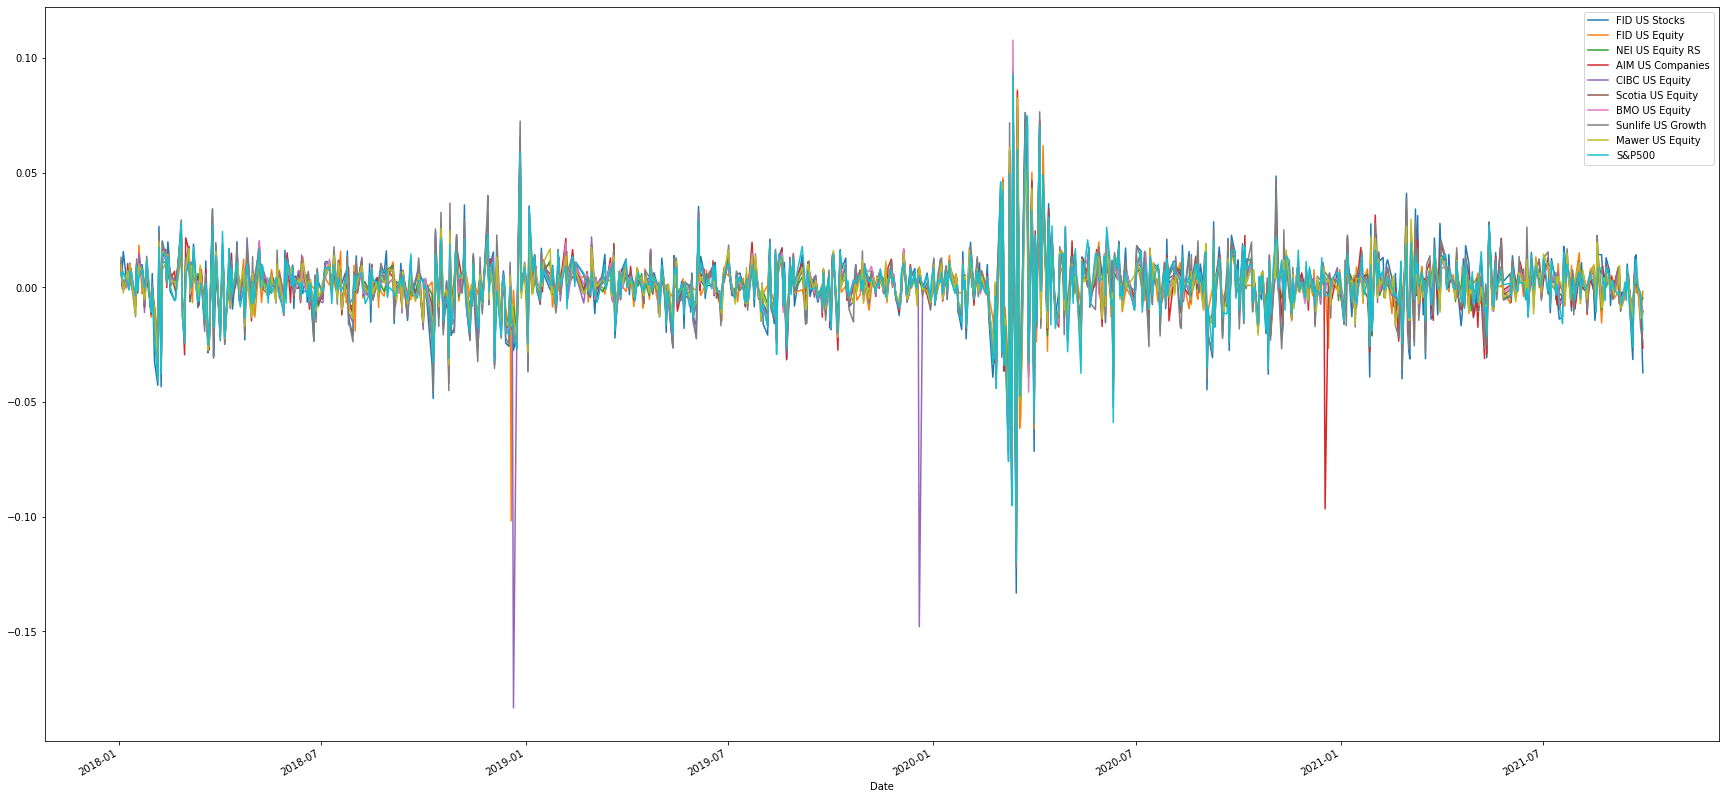

In [13]:
daily_returns.plot(figsize=(30,15))


In [14]:
growth_10k = (1 + daily_returns) * 10000


<AxesSubplot:xlabel='Date'>

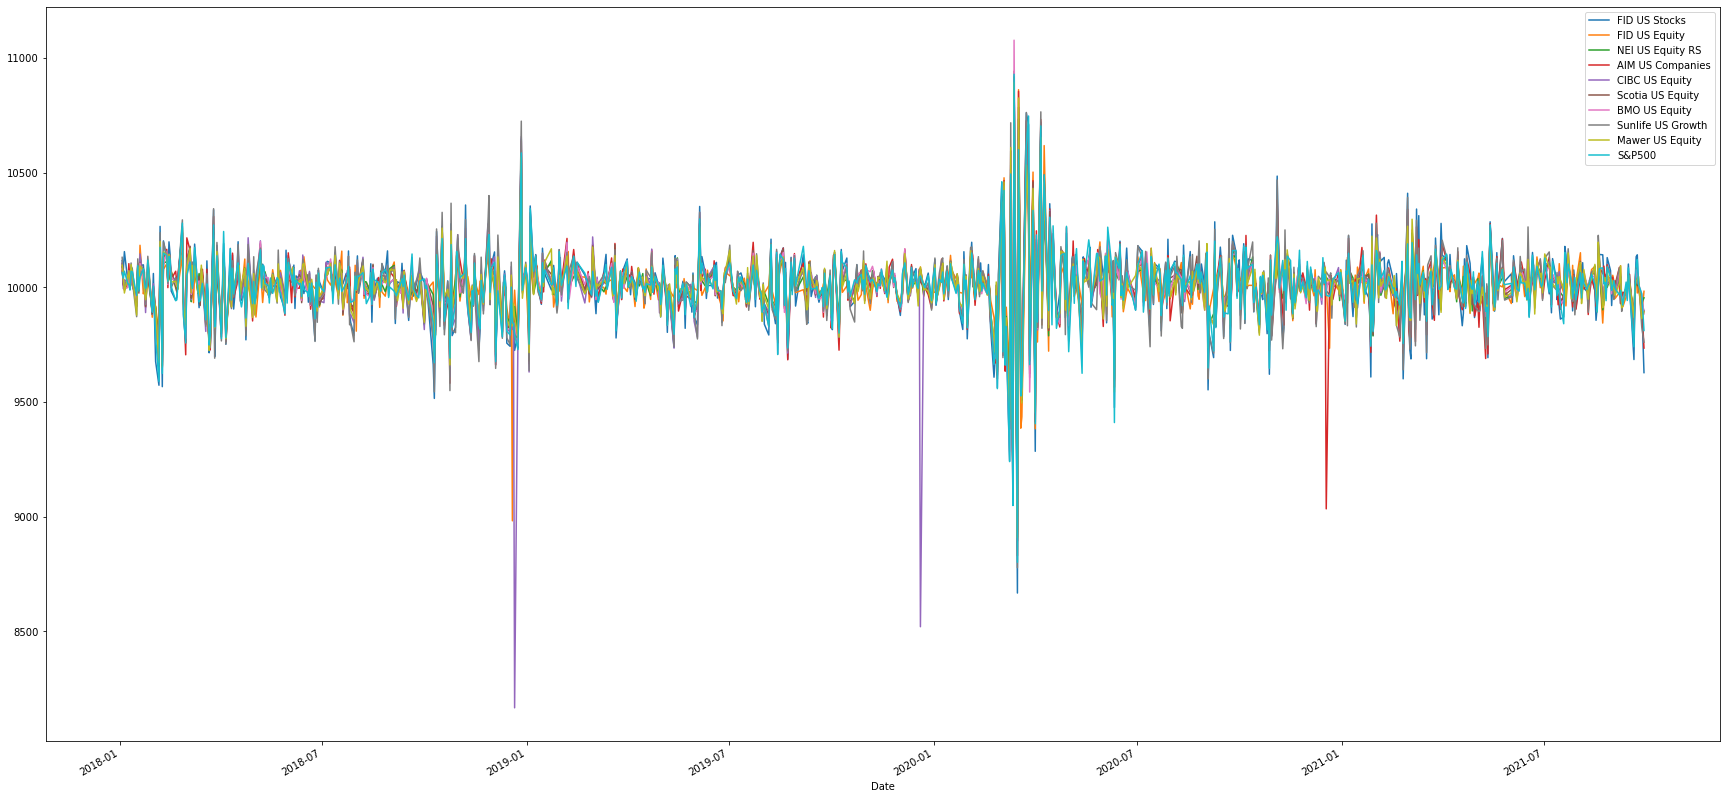

In [15]:
growth_10k.plot(figsize=(30,15))

In [16]:
cumulative_return = (1+ daily_returns).cumprod()-1

In [47]:
growth_of_10K = 10000 * ((1+ daily_returns).cumprod())

<AxesSubplot:xlabel='Date'>

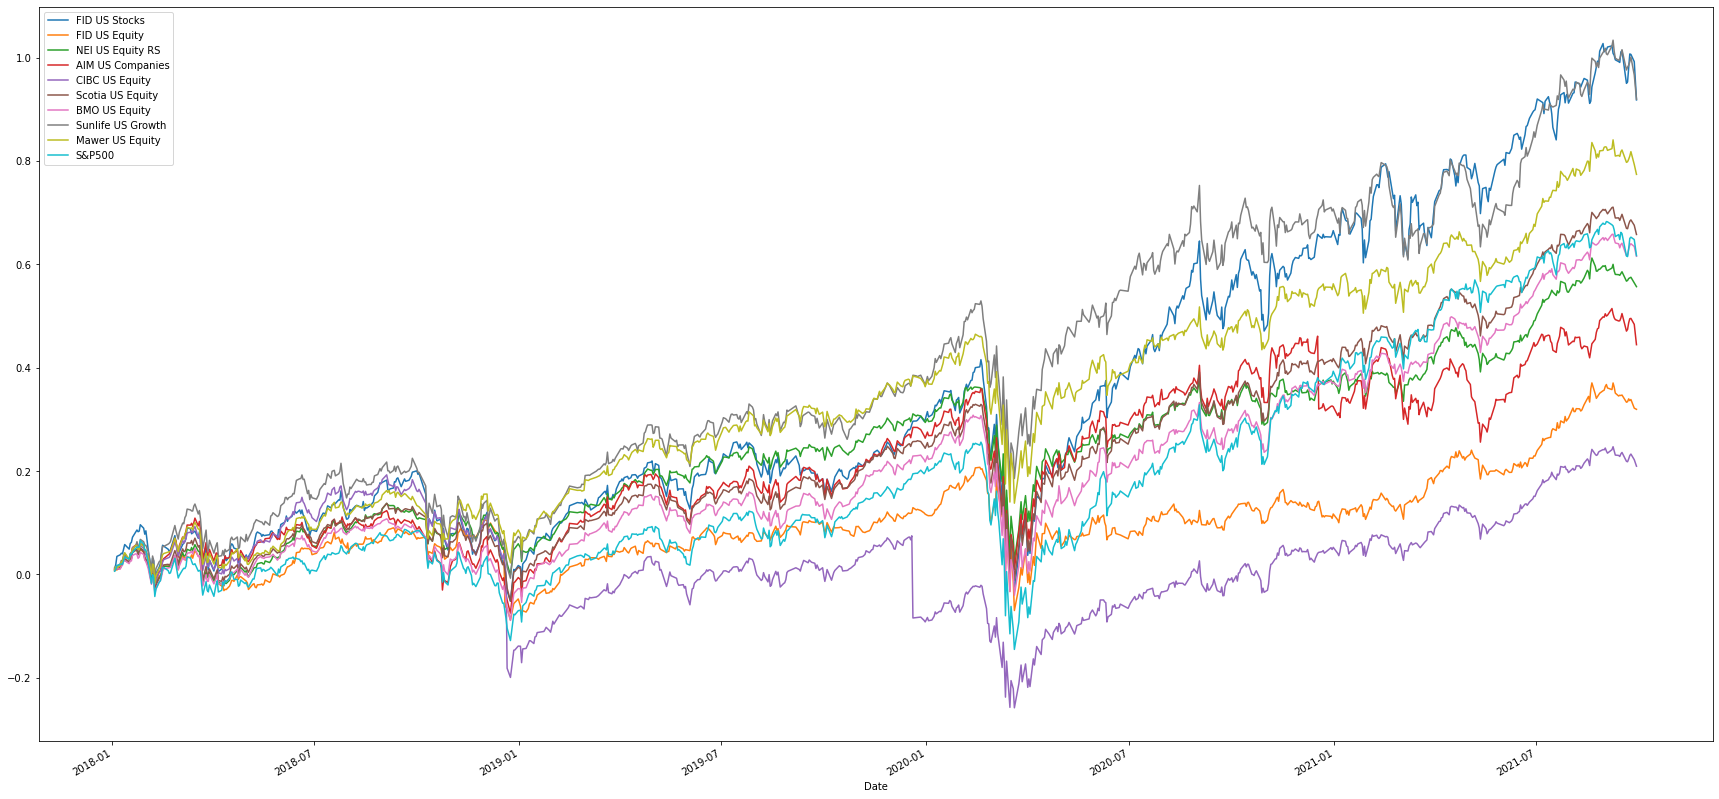

In [48]:
cumulative_return.plot(figsize = (30,15))

In [74]:
#Islotae Covid market decline & recovery data (S&P peak to bottom - Feb19th = March 23rd)
covid_drop = daily_returns.loc["2020-02-19":"2020-03-23"]
covid_recovery = daily_returns.loc["2020-03-23":"2020-08-18"]

(<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>)

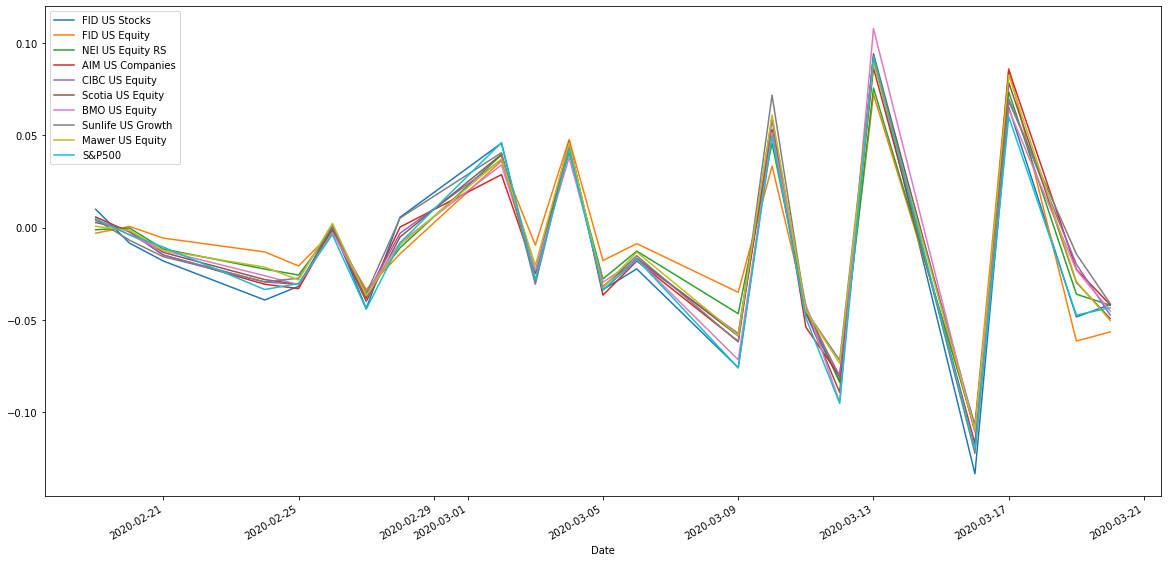

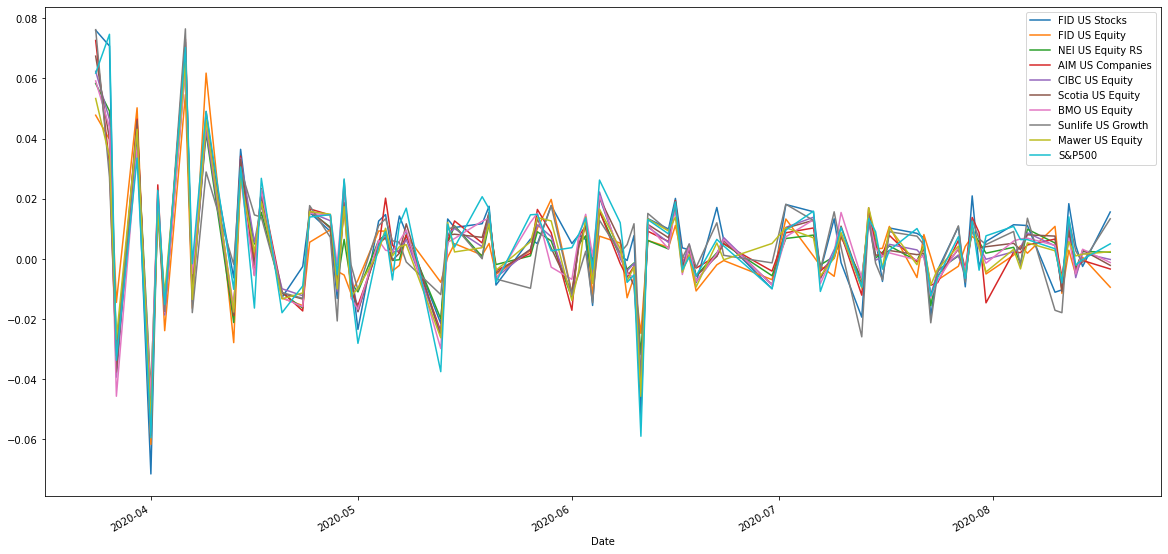

In [75]:
covid_drop.plot(figsize=(20, 10)), covid_recovery.plot(figsize=(20, 10))

In [76]:
covid_drop_cumulative = (1+ covid_drop).cumprod()-1
covid_recovery_cumulative = (1+ covid_recovery).cumprod()-1

In [77]:
covid_drop_cumulative = (1+ covid_drop).cumprod()-1
covid_recovery_cumulative = (1+ covid_recovery).cumprod()-1

(<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>)

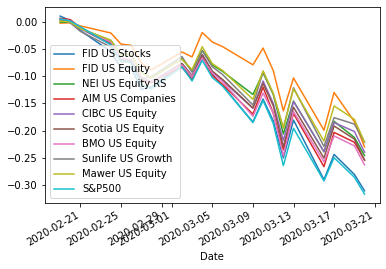

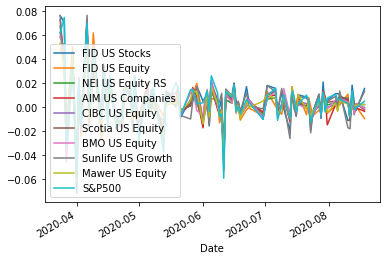

In [78]:
covid_drop_cumulative.plot(), covid_recovery.plot()

In [89]:
#calculate downside capture ratios
index_drop = covid_drop_cumulative["S&P500"]["2020-03-20"]

downside_covid = (covid_drop_cumulative.loc["2020-03-20"]/index_drop)*100
#downside_covid
downside_covid



FID US Stocks         98.074464
FID US Equity         72.613342
NEI US Equity RS      77.638536
AIM US Companies      80.246930
CIBC US Equity        75.677476
Scotia US Equity      80.350083
BMO US Equity         83.057431
Sunlife US Growth     69.998223
Mawer US Equity       69.769198
S&P500               100.000000
Name: 2020-03-20 00:00:00, dtype: float64

In [91]:
#calculate upside capture ratios
index_recovery = covid_recovery_cumulative["S&P500"]["2020-08-18"]

upside_covid = (covid_recovery_cumulative.loc["2020-08-18"]/index_recovery)*100

upside_covid


FID US Stocks        125.661884
FID US Equity         41.228781
NEI US Equity RS      62.847161
AIM US Companies      72.448130
CIBC US Equity        68.996094
Scotia US Equity      73.011384
BMO US Equity         70.098229
Sunlife US Growth     82.444967
Mawer US Equity       62.052967
S&P500               100.000000
Name: 2020-08-18 00:00:00, dtype: float64